<a href="https://colab.research.google.com/github/AzucenaMV/CapstoneProject/blob/master/StockPrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip install yfinance

In [0]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Get tickers from S&P 500 companies 
data = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
table = data[0]
table_sector = table[['Symbol','GICS Sector', 'GICS Sub Industry']]
table_sector['GICS Sector'].value_counts()

Information Technology    71
Industrials               70
Financials                66
Consumer Discretionary    64
Health Care               60
Consumer Staples          33
Real Estate               31
Materials                 28
Utilities                 28
Energy                    28
Communication Services    26
Name: GICS Sector, dtype: int64

In [0]:
table_sector['GICS Sub Industry'].value_counts()

Health Care Equipment                    19
Semiconductors                           13
Industrial Machinery                     13
Electric Utilities                       13
Data Processing & Outsourced Services    12
                                         ..
Steel                                     1
Housewares & Specialties                  1
Consumer Electronics                      1
Food Distributors                         1
Brewers                                   1
Name: GICS Sub Industry, Length: 128, dtype: int64

In [0]:
# Get tickers from S&P500
add_airlines = ['JBLU','SAVE','FTR','SKYW','HA']
tickers_string = ','.join(list(table.Symbol)+add_airlines)

In [0]:
# Industries frames
table_sector['GICS Sub Industry']=table_sector['GICS Sub Industry'].str.lower()
airline = table_sector[table_sector['GICS Sub Industry'].str.contains('airlines')]
oil = table_sector[table_sector['GICS Sub Industry'].str.contains('oil')]
health = table_sector[table_sector['GICS Sub Industry'].str.contains('health')]
tech = table_sector[table_sector['GICS Sub Industry'].str.contains('^technology')]
utilities = table_sector[table_sector['GICS Sub Industry'].str.contains('utilities|power')]
chem = table_sector[table_sector['GICS Sub Industry'].str.contains('chem')]
metals = table_sector[table_sector['GICS Sub Industry'].str.contains('metal')]
finance = table_sector[table_sector['GICS Sub Industry'].str.contains('finance')]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
#import yfinance as yf
#data = yf.download(tickers_string, start="2010-01-01", end="2020-01-31")

In [0]:
#stock_prices = data['Close'].reset_index()
#stock_prices

In [0]:
#from google.colab import files
#stock_prices.to_csv('stock_prices.csv') 
#files.download('stock_prices.csv')

In [0]:
stock_prices=pd.read_csv('https://raw.githubusercontent.com/AzucenaMV/CapstoneProject/master/data/sp500/stock_prices.csv').iloc[:,1:]

In [0]:
frames = [airline,oil,utilities,chem,metals]
sector_df = pd.concat(frames)
final_prices = stock_prices[['Date']+sector_df.Symbol.to_list()]

In [0]:
# Correlation function
def industry_corr(stock_prices,industry,percentil =[1,0],drop = False):
  industry_prices = stock_prices[industry.Symbol]
  if drop:
    stock_prices = stock_prices.drop(industry.Symbol,axis=1)
  stock_prices['industry'] = industry_prices.apply('mean',axis=1)
  corr = stock_prices.corr()
  corr_industry = corr[['industry']].reset_index().rename(columns={"index": "Symbol"})
  corr_industry = corr_industry[(corr_industry.industry <= corr_industry.industry.quantile(percentil[0])) | (corr_industry.industry >= corr_industry.industry.quantile(percentil[1]))]
  return corr_industry

def industry_corr_word(stock_prices,table,word,percentil =[1,0],drop = False):
  industry = table_sector[table_sector['GICS Sub Industry'].str.contains(word)]
  industry_prices = stock_prices[industry.Symbol]
  if drop:
    stock_prices = stock_prices.drop(industry.Symbol,axis=1)
  stock_prices['industry'] = industry_prices.apply('mean',axis=1)
  corr = stock_prices.corr()
  corr_industry = corr[['industry']].reset_index().rename(columns={"index": "Symbol"})
  corr_industry = corr_industry[(corr_industry.industry <= corr_industry.industry.quantile(percentil[0])) | (corr_industry.industry >= corr_industry.industry.quantile(percentil[1]))]
  return corr_industry

# Exploratory Analysis

In [0]:
airline_corr = industry_corr(stock_prices,airline)
oil_corr = industry_corr(stock_prices,oil)
chem_corr = industry_corr(stock_prices,chem)

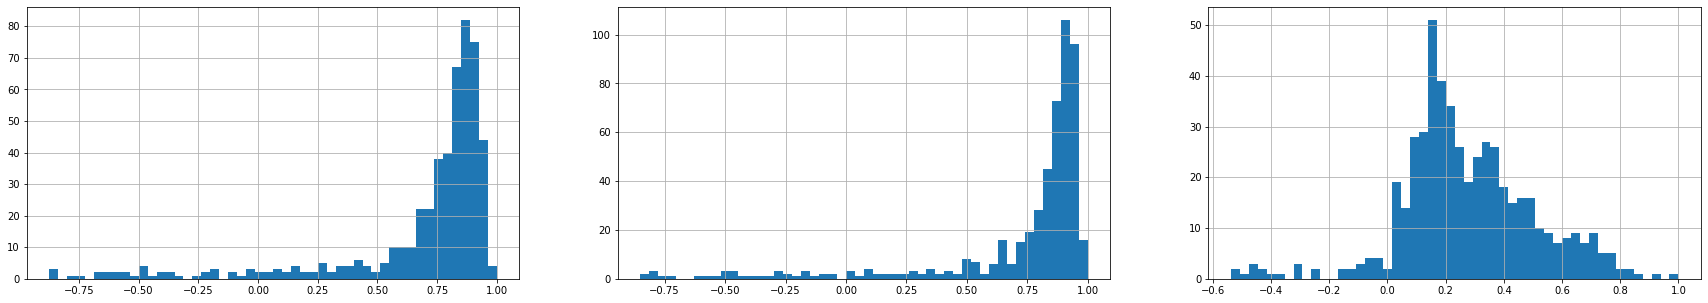

In [0]:
fig = plt.figure(figsize=(30,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
airline_corr.industry.hist(bins=50,ax=ax1)
chem_corr.industry.hist(bins=50,ax=ax2)
oil_corr.industry.hist(bins=50,ax=ax3)
#airline_corr.industry.plot(kind='')

In [0]:
oil['GICS Sub Industry'].unique()

array(['oil & gas exploration & production',
       'oil & gas equipment & services', 'integrated oil & gas',
       'oil & gas drilling', 'oil & gas refining & marketing',
       'oil & gas storage & transportation'], dtype=object)

In [0]:
airline

,Symbol,GICS Sector,GICS Sub Industry
14,ALK,Industrials,airlines
30,AAL,Industrials,airlines
143,DAL,Industrials,airlines
424,LUV,Industrials,airlines
459,UAL,Industrials,airlines


In [0]:
def avg_subindustry(industry, stock_prices):
  #merge_cols= ['GICS Sector','GICS Sub Industry','Symbol']
  subset = stock_prices[industry.Symbol]
  subindustry = {}
  for group_name, df_group in industry.groupby('GICS Sub Industry'):
    subindustry[group_name]=subset[df_group.Symbol].mean(axis=1)
  df=pd.DataFrame.from_dict(subindustry)
  df['Date'] = stock_prices.Date
  return df

def avg_subindustry_word(table, stock_prices, word):
  #merge_cols= ['GICS Sector','GICS Sub Industry','Symbol']
  industry = table_sector[table_sector['GICS Sub Industry'].str.contains(word)]
  subset = stock_prices[industry.Symbol]
  subindustry = {}
  for group_name, df_group in industry.groupby('GICS Sub Industry'):
    subindustry[group_name]=subset[df_group.Symbol].mean(axis=1)
  df=pd.DataFrame.from_dict(subindustry)
  df['Date'] = stock_prices.Date
  return df

def join_sectors(list_words, table, stock_prices):
  industry = {}
  for word in list_words:
    industry[word] = stock_prices[table[table['GICS Sub Industry'].str.contains(word)].Symbol].mean(axis=1)
  industry['Date'] = stock_prices['Date']
  return pd.DataFrame.from_dict(industry)

def merge_df(data, table, col = 'Symbol'):
  final=data.merge(table, on = col, how = 'left')
  return final

In [0]:
percentil = [.01,.98]
air_high_corr = industry_corr(stock_prices,airline, percentil)
oil_high_corr = industry_corr(stock_prices,oil,percentil)
chem_high_corr = industry_corr(stock_prices,chem,percentil)

## Chemical Industry

### Industry correlations

In [0]:
chem_high = merge_df(chem_high_corr,table_sector)
chem_high.sort_values(by='industry')

,Symbol,industry,GICS Sector,GICS Sub Industry
1,APA,-0.852052,Energy,oil & gas exploration & production
11,MOS,-0.816550,Materials,fertilizers & agricultural chemicals
6,FTR,-0.813671,NaN,NaN
4,CTL,-0.808450,Communication Services,alternative carriers
5,FCX,-0.798835,Materials,copper
14,UA,-0.744726,Consumer Discretionary,"apparel, accessories & luxury goods"
8,HBAN,0.966362,Financials,regional banks
3,BLK,0.967440,Financials,asset management & custody banks
10,JNJ,0.969591,Health Care,pharmaceuticals
0,ALL,0.971361,Financials,property & casualty insurance


In [0]:
df=join_sectors(['electronic manufacturing services','trucking','internet & direct marketing retail','diversified banks','paper packaging','oil & gas exploration & production','chemicals'], table_sector, stock_prices)
df.corr()['chemicals'].sort_values()

oil & gas exploration & production    0.357656
electronic manufacturing services     0.922403
internet & direct marketing retail    0.945838
diversified banks                     0.951060
trucking                              0.957700
paper packaging                       0.960909
chemicals                             1.000000
Name: chemicals, dtype: float64

### Subindustry correlations




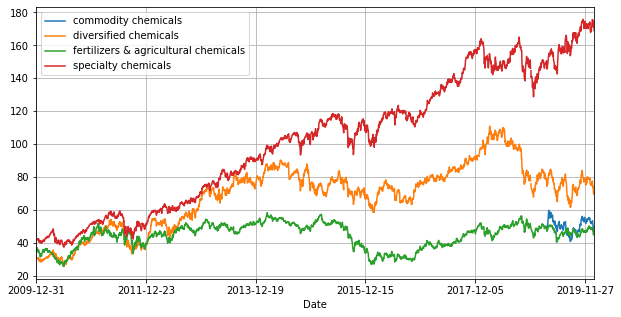

In [0]:
avg_chem = avg_subindustry(chem, stock_prices)
avg_chem.set_index('Date').plot(figsize=(10,5), grid=True)

##### Agricultural Chem

In [0]:
chem_agr_corr = industry_corr_word(stock_prices,table,word ='agricultural chemicals',percentil =[.01,.98],drop = False)
chem_agr_high = merge_df(chem_agr_corr,table_sector)
chem_agr_high.sort_values(by='industry')

,Symbol,industry,GICS Sector,GICS Sub Industry
9,KHC,-0.590541,Consumer Staples,packaged foods & meats
3,COTY,-0.502850,Consumer Staples,personal products
15,UA,-0.353985,Consumer Discretionary,"apparel, accessories & luxury goods"
4,CPB,-0.325020,Consumer Staples,packaged foods & meats
11,NLSN,-0.320956,Industrials,research & consulting services
13,TAP,-0.298176,Consumer Staples,brewers
7,HFC,0.681877,Energy,oil & gas refining & marketing
5,CVX,0.684296,Energy,integrated oil & gas
0,BWA,0.692127,Consumer Discretionary,auto parts & equipment
12,PYPL,0.744647,Information Technology,data processing & outsourced services


##### Specialty Chemicals

In [0]:
chem_spc_corr = industry_corr_word(stock_prices,table,word ='specialty chemicals',percentil =[.01,.98],drop = False)
chem_spc_high = merge_df(chem_spc_corr,table_sector)
chem_spc_high.sort_values(by='industry')

,Symbol,industry,GICS Sector,GICS Sub Industry
1,APA,-0.886902,Energy,oil & gas exploration & production
13,MOS,-0.856835,Materials,fertilizers & agricultural chemicals
4,CTL,-0.856779,Communication Services,alternative carriers
7,FTR,-0.830262,NaN,NaN
6,FCX,-0.829583,Materials,copper
5,DVN,-0.791069,Energy,oil & gas exploration & production
11,JNJ,0.978715,Health Care,pharmaceuticals
9,HD,0.979835,Consumer Discretionary,home improvement retail
3,CB,0.979966,Financials,property & casualty insurance
14,TEL,0.980238,Information Technology,electronic manufacturing services


##### Diversified Chemicals

In [0]:
chem_div_corr = industry_corr_word(stock_prices,table,word ='diversified chemicals',percentil =[.01,.98],drop = False)
chem_div_high = merge_df(chem_div_corr,table_sector)
chem_div_high.sort_values(by='industry')

,Symbol,industry,GICS Sector,GICS Sub Industry
12,NEM,-0.696338,Materials,gold
6,FTR,-0.665301,NaN,NaN
0,APA,-0.634015,Energy,oil & gas exploration & production
11,MOS,-0.622980,Materials,fertilizers & agricultural chemicals
5,FCX,-0.596751,Materials,copper
2,CTL,-0.562879,Communication Services,alternative carriers
9,LKQ,0.892686,Consumer Discretionary,distributors
8,JBHT,0.895777,Industrials,trucking
15,STT,0.896281,Financials,asset management & custody banks
1,COF,0.898212,Financials,consumer finance


In [0]:
df=join_sectors(['industrial conglomerates','luxury','industrial machinery','electronic manufacturing services',
                 'trucking','internet & direct marketing retail','diversified banks','paper packaging',
                 'oil & gas exploration & production','specialty chemicals','agricultural chemicals',
                 'diversified chemicals','insurance'], table_sector, stock_prices)
df.corr()[['specialty chemicals','agricultural chemicals','diversified chemicals']]

,specialty chemicals,agricultural chemicals,diversified chemicals
industrial conglomerates,0.990855,0.184424,0.790447
luxury,0.547839,0.650036,0.798994
industrial machinery,0.982438,0.333859,0.861240
electronic manufacturing services,0.911691,0.242330,0.825274
trucking,0.971126,0.277828,0.798821
internet & direct marketing retail,0.966140,0.168740,0.760687
diversified banks,0.955793,0.232383,0.808158
paper packaging,0.960158,0.161929,0.830751
oil & gas exploration & production,0.256606,0.463399,0.616534
specialty chemicals,1.000000,0.216959,0.830431


## Airline Industry

### Industry correlations



In [0]:
air_high = merge_df(air_high_corr,table_sector)
air_high.sort_values(by='industry')

,Symbol,industry,GICS Sector,GICS Sub Industry
5,FCX,-0.874050,Materials,copper
1,APA,-0.864666,Energy,oil & gas exploration & production
12,MOS,-0.850130,Materials,fertilizers & agricultural chemicals
2,CTL,-0.771920,Communication Services,alternative carriers
4,DVN,-0.754018,Energy,oil & gas exploration & production
6,FTR,-0.681361,NaN,NaN
15,UAL,0.949954,Industrials,airlines
8,HSIC,0.950283,Health Care,health care distributors
10,IPG,0.953661,Communication Services,advertising
9,IFF,0.953959,Materials,specialty chemicals


In [0]:
df=join_sectors(['reinsurance','airline','specialty chemicals','industrial machinery','copper','oil & gas exploration'], table_sector, stock_prices)
df.corr()['airline'].sort_values()

copper                  -0.874050
oil & gas exploration    0.289266
industrial machinery     0.900446
specialty chemicals      0.938163
reinsurance              0.955305
airline                  1.000000
Name: airline, dtype: float64

## Oil & Gas Industry

### Industry correlations

In [0]:
oil_high = merge_df(oil_high_corr,table_sector)
oil_high.sort_values(by='industry')

,Symbol,industry,GICS Sector,GICS Sub Industry
0,ALLE,-0.537444,Industrials,building products
12,NEM,-0.535088,Materials,gold
2,CDW,-0.476675,Information Technology,technology distributors
11,IQV,-0.474578,Health Care,life sciences tools & services
5,FE,-0.459234,Utilities,electric utilities
13,PAYC,-0.456657,Information Technology,application software
8,HOG,0.759298,Consumer Discretionary,motorcycle manufacturers
15,XOM,0.770425,Energy,integrated oil & gas
4,CXO,0.771144,Energy,oil & gas exploration & production
6,FLS,0.782386,Industrials,industrial machinery


In [0]:
df=join_sectors(['auto parts','hotel','luxury','industrial machinery','motorcycle','oil'], table_sector, stock_prices)
df.corr()['oil'].sort_values()

hotel                   0.242780
industrial machinery    0.426034
auto parts              0.604784
luxury                  0.732130
motorcycle              0.759298
oil                     1.000000
Name: oil, dtype: float64

### Subindustry correlations


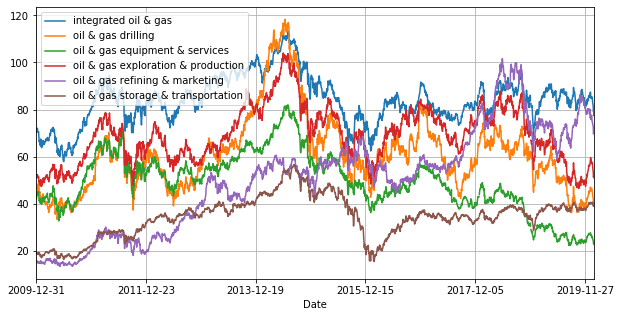

In [0]:
avg_oil = avg_subindustry(oil, stock_prices)
avg_oil.set_index('Date').plot(figsize=(10,5), grid=True)

In [0]:
df=join_sectors(['integrated oil','gas drilling','gas equipment','gas exploration','gas refining','gas storage'], table_sector, stock_prices)
df.corr()

,integrated oil,gas drilling,gas equipment,gas exploration,gas refining,gas storage
integrated oil,1.000000,0.805787,0.591042,0.765565,0.345296,0.802627
gas drilling,0.805787,1.000000,0.728813,0.904147,0.269812,0.675171
gas equipment,0.591042,0.728813,1.000000,0.661699,-0.322377,0.376391
gas exploration,0.765565,0.904147,0.661699,1.000000,0.371904,0.646468
gas refining,0.345296,0.269812,-0.322377,0.371904,1.000000,0.519476
gas storage,0.802627,0.675171,0.376391,0.646468,0.519476,1.000000


In [0]:
oil_exp_corr = industry_corr_word(stock_prices,table,word ='gas drilling|gas exploration',percentil =[.01,.98],drop = False)
oil_exp_high = merge_df(oil_exp_corr,table_sector)
oil_exp_high.sort_values(by='industry')

,Symbol,industry,GICS Sector,GICS Sub Industry
0,ALLE,-0.594431,Industrials,building products
11,PAYC,-0.559816,Information Technology,application software
2,CDW,-0.559505,Information Technology,technology distributors
10,IQV,-0.541690,Health Care,life sciences tools & services
5,FE,-0.526542,Utilities,electric utilities
15,ZTS,-0.507522,Health Care,pharmaceuticals
9,HST,0.733658,Real Estate,hotel & resort reits
7,HOG,0.745255,Consumer Discretionary,motorcycle manufacturers
3,CPRI,0.750165,Consumer Discretionary,"apparel, accessories & luxury goods"
14,XOM,0.759029,Energy,integrated oil & gas


In [0]:
oil_str_corr = industry_corr_word(stock_prices,table,word ='gas refining',percentil =[.01,.98],drop = False)
oil_str_high = merge_df(oil_str_corr,table_sector)
oil_str_high.sort_values(by='industry')

,Symbol,industry,GICS Sector,GICS Sub Industry
0,APA,-0.814515,Energy,oil & gas exploration & production
6,FTR,-0.781318,NaN,NaN
2,CTL,-0.764292,Communication Services,alternative carriers
5,FCX,-0.751078,Materials,copper
9,MOS,-0.738149,Materials,fertilizers & agricultural chemicals
4,DVN,-0.686563,Energy,oil & gas exploration & production
14,VFC,0.928534,Consumer Discretionary,"apparel, accessories & luxury goods"
12,TEL,0.929892,Information Technology,electronic manufacturing services
7,HBAN,0.930511,Financials,regional banks
3,DFS,0.932687,Financials,consumer finance


In [0]:
oil_int_corr = industry_corr_word(stock_prices,table,word ='integrated oil',percentil =[.01,.98],drop = False)
oil_int_high = merge_df(oil_int_corr,table_sector)
oil_int_high.sort_values(by='industry')

,Symbol,industry,GICS Sector,GICS Sub Industry
0,ALLE,-0.594431,Industrials,building products
11,PAYC,-0.559816,Information Technology,application software
2,CDW,-0.559505,Information Technology,technology distributors
10,IQV,-0.541690,Health Care,life sciences tools & services
5,FE,-0.526542,Utilities,electric utilities
15,ZTS,-0.507522,Health Care,pharmaceuticals
9,HST,0.733658,Real Estate,hotel & resort reits
7,HOG,0.745255,Consumer Discretionary,motorcycle manufacturers
3,CPRI,0.750165,Consumer Discretionary,"apparel, accessories & luxury goods"
14,XOM,0.759029,Energy,integrated oil & gas


In [0]:
oil_str_corr = industry_corr_word(stock_prices,table,word ='gas storage',percentil =[.01,.98],drop = False)
oil_str_high = merge_df(oil_str_corr,table_sector)
oil_str_high.sort_values(by='industry')

,Symbol,industry,GICS Sector,GICS Sub Industry
11,NEM,-0.599340,Materials,gold
9,KHC,-0.419278,Consumer Staples,packaged foods & meats
10,NCLH,-0.333747,Consumer Discretionary,"hotels, resorts & cruise lines"
14,UA,-0.330143,Consumer Discretionary,"apparel, accessories & luxury goods"
8,JNPR,-0.325312,Information Technology,communications equipment
6,FTR,-0.290302,NaN,NaN
4,DISCK,0.788936,Communication Services,broadcasting
5,FLS,0.789980,Industrials,industrial machinery
2,COG,0.792833,Energy,oil & gas exploration & production
7,HPE,0.797176,Information Technology,"technology hardware, storage & peripherals"


In [0]:
nt_corr = industry_corr_word(stock_prices,table,word ='gas equipment',percentil =[.01,.98],drop = False)
oil_int_high = merge_df(oil_int_corr,table_sector)
oil_int_high.sort_values(by='industry')

,Symbol,industry,GICS Sector,GICS Sub Industry
11,NEM,-0.599340,Materials,gold
9,KHC,-0.419278,Consumer Staples,packaged foods & meats
10,NCLH,-0.333747,Consumer Discretionary,"hotels, resorts & cruise lines"
14,UA,-0.330143,Consumer Discretionary,"apparel, accessories & luxury goods"
8,JNPR,-0.325312,Information Technology,communications equipment
6,FTR,-0.290302,NaN,NaN
4,DISCK,0.788936,Communication Services,broadcasting
5,FLS,0.789980,Industrials,industrial machinery
2,COG,0.792833,Energy,oil & gas exploration & production
7,HPE,0.797176,Information Technology,"technology hardware, storage & peripherals"


In [0]:
df=join_sectors(['gas equipment','gas storage','integrated oil','gas refining','gas drilling|gas exploration',
                 'auto parts & equipment','apparel', 'luxury goods','trucking','semiconductors','technology hardware',
                 'aerospace & defense','consumer finance'], table_sector, stock_prices)
df.corr()[['gas equipment','gas storage','integrated oil','gas refining','gas drilling|gas exploration']]

,gas equipment,gas storage,integrated oil,gas refining,gas drilling|gas exploration
gas equipment,1.000000,0.376391,0.591042,-0.322377,0.673767
gas storage,0.376391,1.000000,0.802627,0.519476,0.656198
integrated oil,0.591042,0.802627,1.000000,0.345296,0.776996
gas refining,-0.322377,0.519476,0.345296,1.000000,0.366319
gas drilling|gas exploration,0.673767,0.656198,0.776996,0.366319,1.000000
auto parts & equipment,-0.122095,0.620160,0.439994,0.907602,0.511644
apparel,0.094529,0.776212,0.602990,0.805900,0.570972
luxury goods,0.253257,0.816405,0.702430,0.703014,0.629945
trucking,-0.515043,0.422204,0.219292,0.935961,0.194177
semiconductors,-0.599555,0.289013,0.085385,0.871019,0.107729


In [0]:
#fig, ax = plt.subplots(figsize=(20,20))        
#corr = final_prices.corr()
#sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
#            square=True, ax = ax)
#ax.set_title('Sectors Correlation')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
#plt.show()

# Collecting crashes

In [0]:
data = pd.read_html('https://en.wikipedia.org/wiki/List_of_aircraft_accidents_and_incidents_resulting_in_at_least_50_fatalities')

In [0]:
table = data[3]
table.columns = table.columns.droplevel()
table.head()

,Tot,C,P,G,N,T,Incident[nb 1],Aircraft,Location,Phase,Airport,Distance,Date
0,"est. 1,700",11,81,"est. 1,600[nb 2]",†,INH,American Airlines Flight 11,Boeing 767-223ER,NaN,ENR[11],NaN,NaN,2001-09-11
1,"est. 1,000",9,56,est. 900[nb 2],†,INH,United Airlines Flight 175,Boeing 767-222,NaN,ENR[12],NaN,NaN,2001-09-11
2,583,23,560,0,NaN,COM,Pan Am Flight 1736 andKLM Flight 4805,Boeing 747-121 and Boeing 747-206B,"Tenerife, Spain",TXI/TOF[10][16][17],TFN,NaN,1977-03-27
3,520,15,505,0,NaN,COM,Japan Airlines Flight 123,Boeing 747SR-46,"Ueno, Japan",ENR[18][19],NaN,NaN,1985-08-12
4,349,33,316,0,†,COM,Saudi Arabian Flight 763 andKazakhstan Airline...,Boeing 747-168B and Ilyushin Il-76TD,"Charkhi Dadri, India",ENR[20][21],NaN,NaN,1996-11-12


In [0]:
table = table.loc[table['Date'] > '2009-12-31']
table['Date'] = pd.to_datetime(table['Date'],infer_datetime_format=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
table

,Tot,C,P,G,N,T,Incident[nb 1],Aircraft,Location,Phase,Airport,Distance,Date
8,298,15,283,0,†,EXG,Malaysia Airlines Flight 17,Boeing 777-2H6ER,"Hrabove, Donetsk Oblast, Ukraine",ENR[27],NaN,NaN,2014-07-17
17,257,10,247,0,†,MIL,Algerian Air Force (7T-WIV),Ilyushin Il-76TD,"Boufarik, Algeria",ICL[41],NaN,NaN,2018-04-11
21,239,12,227,0,†[nb 5],COM,Malaysia Airlines Flight 370,Boeing 777-2H6ER,NaN,ENR[47],NaN,NaN,2014-03-08
28,224,7,217,0,†,INB,Metrojet Flight 9268,Airbus A321-231,"near Hasna, North Sinai Governorate, Egypt",ENR[57],NaN,NaN,2015-10-31
36,189,8,181,0,†,COM,Lion Air Flight 610,Boeing 737 MAX 8,"Java Sea, off Tanjungbungin, Karawang Regency,...",ENR[66],NaN,NaN,2018-10-29
46,176,9,167,0,†,EXG,Ukraine International Airlines Flight 752,Boeing 737-800,"Tehran, Iran",ICL,IKA,NaN,2020-01-08
58,162,7,155,0,†,COM,Indonesia AirAsia Flight 8501,Airbus A320-216,"Karimata Strait, between Belitung and Borneo, ...",ENR[91],NaN,NaN,2014-12-28
62,159,6,147,6,†,COM,Dana Air Flight 992,McDonnell Douglas MD-83,"Lagos, Nigeria",APR[95],LOS,9.3 km(5.8 mi),2012-06-03
66,158,6,152,0,NaN,COM,Air India Express Flight 812,Boeing 737-8HG,"Mangalore, India",LDG[99],IXE,NaN,2010-05-22
67,157,8,149,0,†,COM,Ethiopian Airlines Flight 302,Boeing 737 MAX 8,"Bishoftu, Ethiopia",ENR[100],NaN,NaN,2019-03-10


In [0]:
!pip install beautifulsoup4

In [0]:
import bs4 as bs
import requests
resp = requests.get('https://www.who.int/csr/don/archive/country/usa/en/')
soup = bs.BeautifulSoup(resp.text, 'lxml')
table = soup.find('div', {'class': 'col_2-1_1'})


In [0]:
table

<div class="col_2-1_1">
<h1 class="headline">United States of America</h1>
<h3 class="section_head1">Disease outbreak news</h3>
<ul class="auto_archive">
<li>
<a href="/csr/don/20-february-2017-seoulvirus-usa-and-canada/en/">20 February 2017</a><!-- date -->
<br/><span class="link_info">Seoul virus â United States of America and Canada </span><!-- title -->
</li>
<li>
<a href="/csr/don/14-june-2016-chikungunya-usa/en/">14 June 2016</a><!-- date -->
<br/><span class="link_info">Chikungunya â United States of America</span><!-- title -->
</li>
<li>
<a href="/csr/don/21-april-2016-elizabethkingia-usa/en/">21 April 2016</a><!-- date -->
<br/><span class="link_info">Elizabethkingia â United States of America</span><!-- title -->
</li>
<li>
<a href="/csr/don/21-march-2016-gbs-usa/en/">21 March 2016</a><!-- date -->
<br/><span class="link_info">Guillain-BarrÃ© syndrome â United States of America</span><!-- title -->
</li>
<li>
<a href="/csr/don/12-february-2016-zika-usa/en/">12 Februa

In [0]:
disease = []
for row in table.findAll('tr')[1:]:
    disease = row.findAll('td')[0].text
    disease.append(ticker)

In [0]:
table.findAll('li'):

SyntaxError: ignored